In [5]:
import glob
import pandas as pd
import pylab as plt
import seaborn as sns

In [6]:
evaluation = (pd.concat([pd.read_excel(path)
            .assign(type=path[:-16]) for path in glob.glob('*_evaluation.xlsx')], sort=True)
 .reset_index(False)
 .rename({'index': 'name'}, axis=1))

def get_model_family(name):
    if name.startswith('MLP'):
        return 'Neural'
    elif name.startswith('GradientBoosting') or name.startswith('RandomForest'):
        return 'Tree'
    else:
        return 'Linear'
    
evaluation['family'] = evaluation['name'].apply(get_model_family)

In [7]:
evaluation = evaluation.sort_values('threshold_socre', ascending=False)
evaluation

,name,accuracy_score,explained_variance_score,f1_score_micro,mean_absolute_error,mean_squared_error,r2_score,threshold_socre,type,family
14,MLP-deep,0.6484,0.7362,0.6484,0.4923,0.5122,0.7351,0.9437,probs_avg_classification,Neural
15,SVC rbf,0.6415,0.7296,0.6415,0.4904,0.5233,0.7294,0.9423,probs_avg_classification,Linear
25,MLP 128,0.5192,0.6951,0.5192,0.5999,0.5908,0.6945,0.9409,regression,Neural
26,MLP 64,0.5522,0.6822,0.5522,0.5971,0.6146,0.6822,0.9382,regression,Neural
16,MLP 32,0.6030,0.6993,0.6030,0.5436,0.5815,0.6993,0.9382,probs_avg_classification,Neural
17,MLP 64,0.5893,0.7017,0.5893,0.5420,0.5772,0.7015,0.9368,probs_avg_classification,Neural
27,MLP 32,0.5165,0.6715,0.5165,0.6252,0.6409,0.6686,0.9341,regression,Neural
28,MLP 16,0.5440,0.6829,0.5440,0.5961,0.6132,0.6829,0.9327,regression,Neural
29,MLP-deep,0.5975,0.7030,0.5975,0.5397,0.5753,0.7025,0.9327,regression,Neural
2,MLP-deep,0.6868,NaN,0.6868,NaN,NaN,NaN,0.9327,classification,Neural


In [10]:
evaluation[['type', 'family', 'name', 'accuracy_score', 'threshold_socre']].to_excel('model-comparision.xlsx')

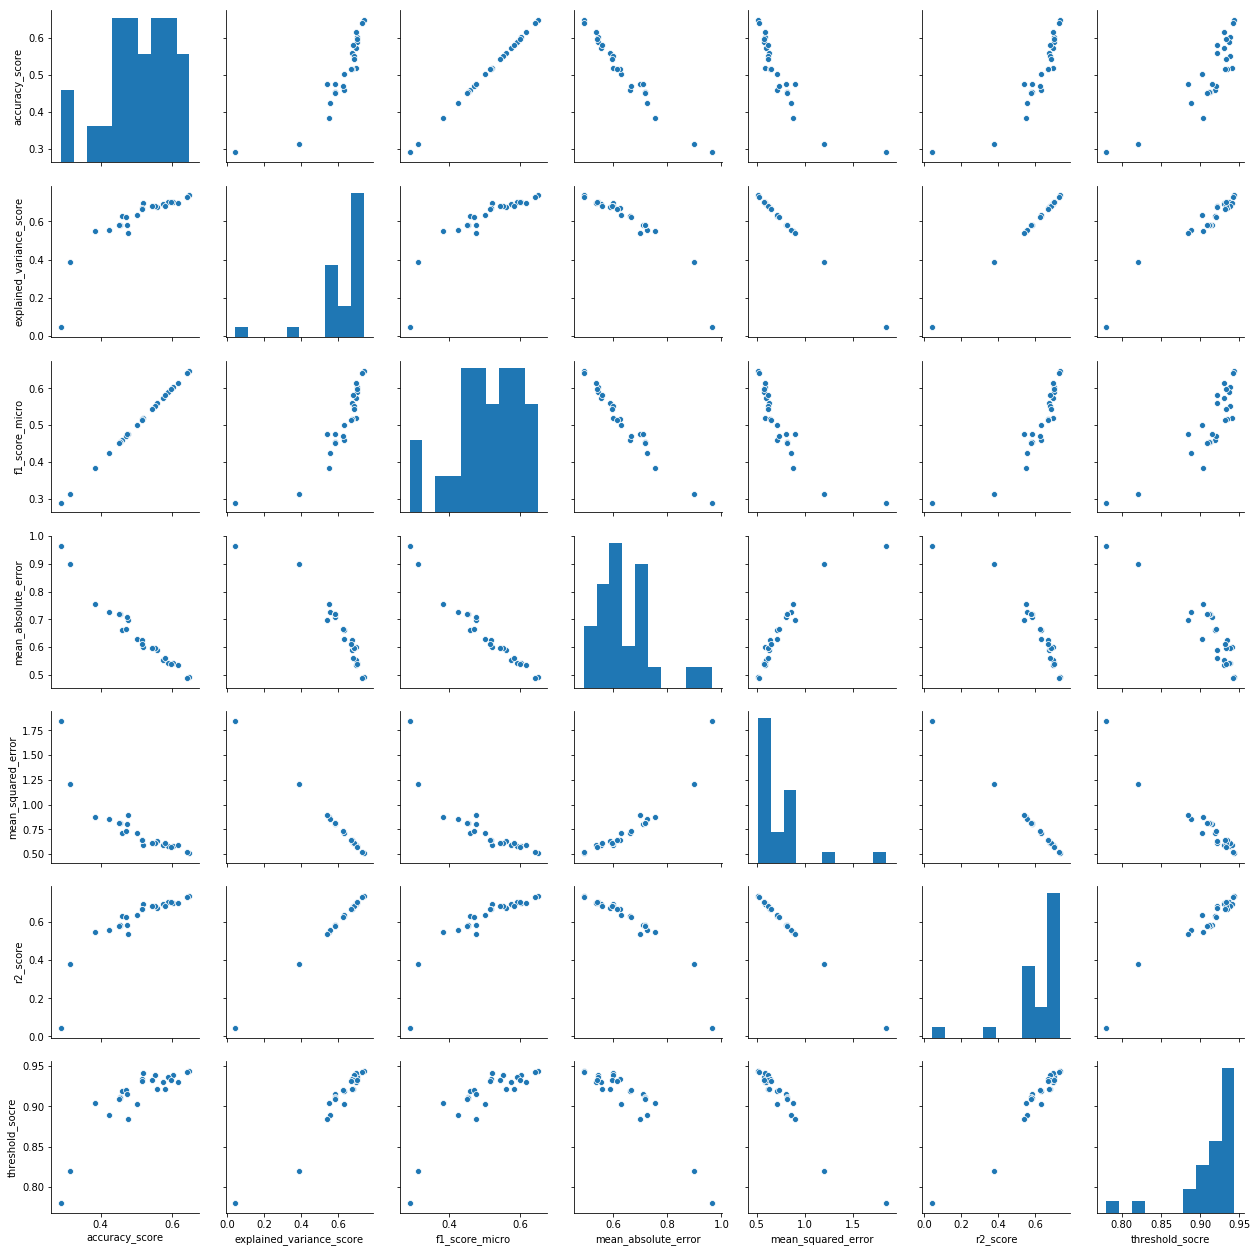

In [4]:
sns.pairplot(evaluation.dropna())

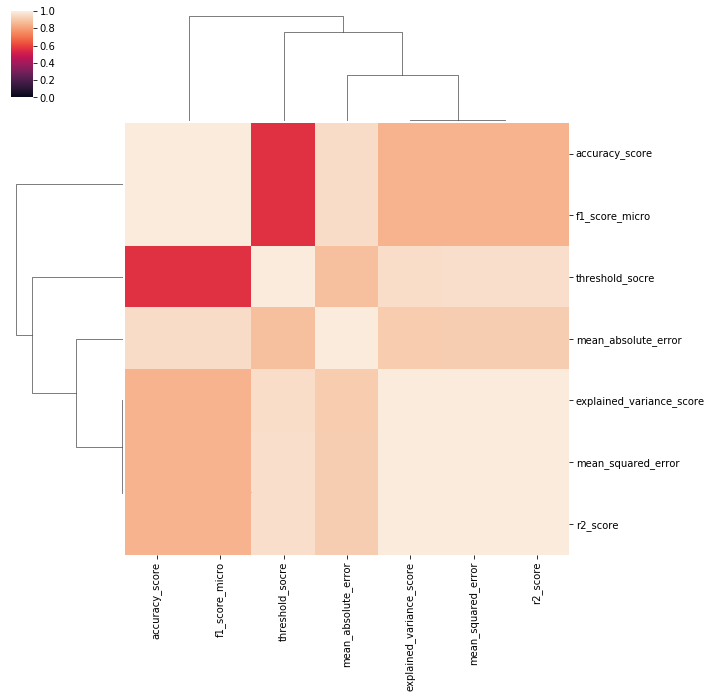

In [5]:
sns.clustermap(evaluation.corr().abs(), vmin=0)

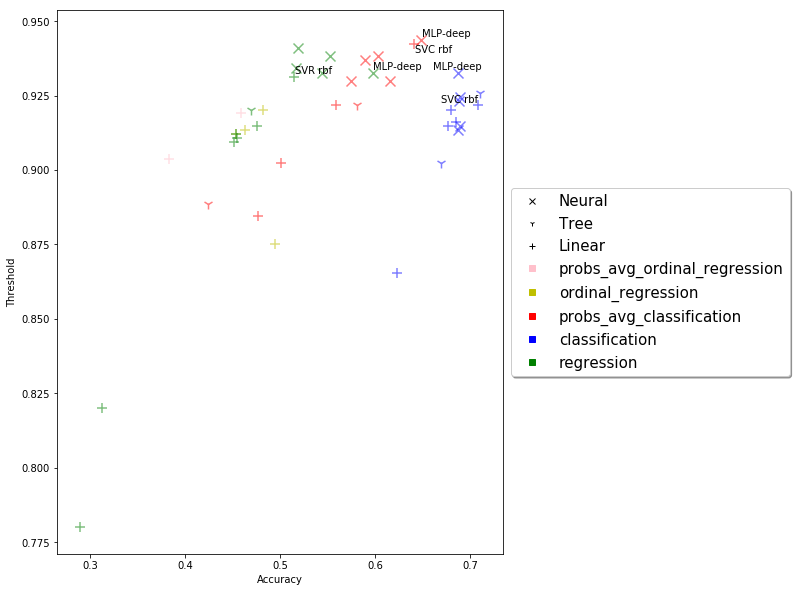

In [12]:
from adjustText import adjust_text

colors = ['r', 'g', 'b', 'y', 'pink']

f, ax = plt.subplots(1, figsize=(10, 10))

make_handle = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]
handles = []
labels = []
family2marker = {'Linear': '+',
                 'Tree': '1',
                 'Neural': 'x'}
type2color = dict(zip(evaluation['type'].unique(), colors))
        
for family, marker in family2marker.items():
    labels.append(family)
    handles.append(make_handle(marker, 'k'))

for type_, color in type2color.items():
    labels.append(type_)
    handles.append(make_handle('s', color))
   

for family, family_group in evaluation.groupby('family'):
    for type_, type_group in family_group.groupby('type'):
        type_group.plot(kind='scatter', x='accuracy_score', y='threshold_socre',
                        marker=family2marker[family], color=type2color[type_], s=100,
                        alpha=0.5,
                        ax=ax)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5),
          fancybox=True, shadow=True, fontsize=15)

texts = [ax.text(r['accuracy_score'], r['threshold_socre'], r['name'])
             for _, r in evaluation[evaluation['name'].str.match('(SV. rbf|MLP-deep)')].iterrows()]
    
adjust_text(texts);

#ax.set_title('Features2Prediction Models Comparison')

ax.set_xlabel('Accuracy')
ax.set_ylabel('Threshold')

f.savefig('models-comparison.png', dpi=300)